In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

import sys
from pathlib import Path
import os 
sys.path.append(str(Path(os.getcwd()).parent / "src"))
from constriction import total_energy2, total_energy, F, h 

(0.0, 1.0)

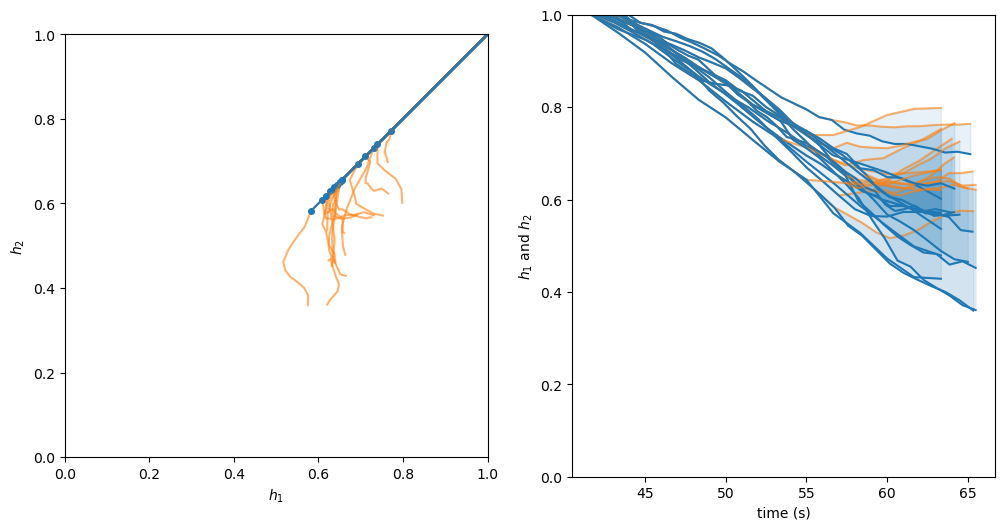

In [8]:
path = '../data/furrow_position_h1_h2/furrow_position_wt/'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for file in os.listdir(path):
    if file.endswith('.npy') and file.startswith('Replicate'):
        data = np.load(os.path.join(path, file))
        h1 = data[1]/data[1][0]
        h2 = data[2]/data[2][0]
        m = (h1 == h2) 
        axes[0].plot(h1, h2, '-', alpha=0.6, color='tab:orange', linewidth=1.5)
        axes[0].plot(h1[m], h2[m], '-', alpha=1, color='tab:blue', linewidth=1.5 )
        axes[0].plot(h1[m][-1], h2[m][-1], 'o', color='tab:blue', markersize=4)

        axes[1].plot(data[0], h1, '-', alpha=0.6, color='tab:orange', linewidth=1.5)
        axes[1].plot(data[0], h2, '-', alpha=1, color='tab:blue', linewidth=1.5)
        axes[1].fill_between(data[0], h1, h2, color='tab:blue', alpha=0.1)
axes[0].set_xlabel(r'$h_1$')
axes[0].set_ylabel(r'$h_2$')
axes[0].set_xlim(0, 1 )
axes[0].set_ylim(0, 1)
axes[0].set_aspect('equal', adjustable='box')

axes[1].set_xlabel('time (s)')
axes[1].set_ylabel(r'$h_1$ and $h_2$')
axes[1].set_ylim(0, 1)

(2, 20)
168.67823029553986
(2, 10)
91.51245143681514
(2, 20)
168.76330217147665
(2, 20)
180.0


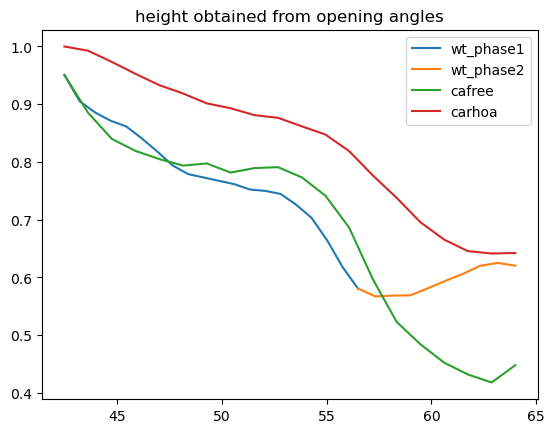

In [7]:
angle_labels = ['wt_phase1', 'wt_phase2', 'cafree', 'carhoa']

for l in angle_labels:
    filename = f'../data/opening_angles/angle_{l}.npy'

    angles = np.load(filename) 
    angles[1][angles[1] > 180] = 180
    print(angles.shape) 
    plt.plot(angles[0], h(angles[1]/2/180*np.pi), label=l)
    print(angles[1][0])
plt.title('height obtained from opening angles')
plt.legend()
plt.show()  